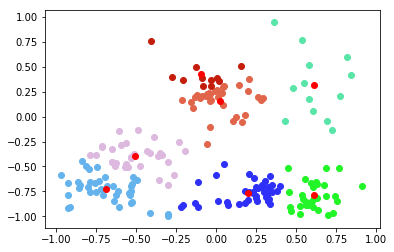

In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt
 
 # красными точками обозначены центры кластеров
 
def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters
 
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu
 
def has_converged(mu, oldmu):
    return (set([tuple(b) for b in mu]) == set([tuple(b) for b in oldmu]))
 
def find_centers(X, K):
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        
        clusters = cluster_points(X, mu)
        
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)
	
#X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(5)])



#plt.plot(X[:, 0], X[:, 1], 'ro')
#plt.show()

def init_board(N):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X    

def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1, 1), random.uniform(-1, 1))
        s = random.uniform(0.05,0.5)
        x = []
        while len(x) < n:
            a, b = np.array([np.random.normal(c[0], s), np.random.normal(c[1], s)])
            # Continue drawing points from the distribution in the range [-1,1]
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X


# Initialize points
n_points = 200
n_clusters = 7

X = init_board_gauss(n_points, n_clusters)

# Cluster points
mu, clusters = find_centers(list(X), n_clusters)
clusters = cluster_points(X, mu)

# Generate random colors
def generate_random_color():
    r = lambda: random.randint(0,255)
    return '#%02X%02X%02X' % (r(),r(),r())

# getting center

x_centers = []
y_centers = []
for i in range(len(mu)):
    x_centers.append(mu[i][0])
    y_centers.append(mu[i][1])
# Plot each cluster
for i in range(0, n_clusters):
    colx = tuple(x[0] for x in clusters[i])
    coly = tuple(x[1] for x in clusters[i])
    cluster_color = generate_random_color()
    plt.scatter(colx,coly, color=cluster_color)
plt.plot(x_centers, y_centers, 'ro')
plt.show()

